#### Student Name: Han Hoang - PISD: 2088807

## Task 2: Creating a Pipeline Encapsulating Data Sampling, Data Splitting, Feature Selection, Feature Creation and Classification Steps.

**2.1. Find the proportion of two class samples. Report number of class-0 and class-1 samples and the ratio (#Class 0)/(#Class 1).**

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('PS1-Task2.csv')
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Label
0,-8.612445,-9.729022,-30.050765,90.482367,1
1,0.902390,-0.316833,0.699654,0.337164,0
2,-25.307502,-20.669486,-62.605756,250.631483,1
3,-21.844937,-4.288478,-14.848927,235.177479,0
4,26.185707,-24.207999,-76.018547,-267.134888,1


In [92]:
class_0 = df[df['Label']==0]
class_1 = df[df['Label']==1]
ratio = len(class_0)/len(class_1)
print('Number of Class 0 =',len(class_0))
print('Number of Class 1 =',len(class_1))
print('#(Class 0)/#(Class 1) =',ratio)

Number of Class 0 = 5000
Number of Class 1 = 3400
#(Class 0)/#(Class 1) = 1.4705882352941178


**2.2. Sampling (regular): Write a function that randomly samples “q” number of samples from dataset (without replacement) and return the new created dataset. Set q=1000 and report the number of class-0 and class-1 samples and the ratio (#Class 0)/(#Class 1) for new created dataset. (Call this dataset dataset2).**

In [7]:
def sampling(dataset,q):
    return dataset.sample(n=q)

dataset2 = sampling(df,1000)

In [93]:
class_0_dataset2 = dataset2[dataset2['Label']==0].shape[0]
class_1_dataset2 = dataset2[dataset2['Label']==1].shape[0]
print('Number of Class 0 =',class_0_dataset2)
print('Number of Class 1 =',class_1_dataset2)
print('#(Class 0)/#(Class 1) =',class_0_dataset2/class_1_dataset2)

Number of Class 0 = 592
Number of Class 1 = 408
#(Class 0)/#(Class 1) = 1.4509803921568627


**2.3. Sampling (Stratified): Write a function that randomly samples “q” number of samples from dataset (without replacement) and preserves proportion of the number of different class samples. This sampling is called stratified sampling. Set q=1000 and report the number of class-0 and class-1 samples and the ratio (#Class 0)/(#Class 1) for new created dataset. (Call this dataset dataset3).**

In [94]:
def stratified_sampling(dataset, q):
    class_0_dataset = dataset[dataset['Label']==0]
    class_1_dataset = dataset[dataset['Label']==1]
    num_class_0 = int(q*len(class_0_dataset)/len(dataset))
    num_class_1 = q - num_class_0
    sample_0 = class_0_dataset.sample(n = num_class_0)
    sample_1 = class_1_dataset.sample(n = num_class_1)
    return pd.concat([sample_0,sample_1])

dataset3 = stratified_sampling(df,1000)
#dataset3

class_0_dataset3 = dataset3[dataset3['Label']==0].shape[0]
class_1_dataset3 = dataset3[dataset3['Label']==1].shape[0]
print('Number of Class 0 =',class_0_dataset3)
print('Number of Class 1 =',class_1_dataset3)
print('#(Class 0)/#(Class 1) =',class_0_dataset3/class_1_dataset3)

Number of Class 0 = 595
Number of Class 1 = 405
#(Class 0)/#(Class 1) = 1.4691358024691359


**2.4. Feature Selection: Compute the covariance matrix for dataset3. Report this covariance matrix. Select two features that you think they may provide better discrimination between two classes. Report selected features (Feature #1, #2, #3 or #4) and explain your reasons. Create a new dataset including only these two features. Call this dataset dataset4. Write a function for this step.**

In [123]:
cov_data = dataset3.drop('Label',axis=1)
cov_matrix = cov_data.cov()
cov_matrix

,Feature 1,Feature 2,Feature 3,Feature 4
Feature 1,219.718652,-2.644376,-8.798077,-2195.500023
Feature 2,-2.644376,220.518238,659.581433,28.496771
Feature 3,-8.798077,659.581433,1979.161916,93.481261
Feature 4,-2195.500023,28.496771,93.481261,22006.537807


In [146]:
def select_features(dataset):
    matrix = dataset.drop('Label',axis=1).cov()
    target_row, target_col = 0,0
    closest_to_0 = np.inf
    array = np.array(matrix)
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            if abs(array[i,j]) < closest_to_0:
                closest_to_0 = array[i,j]
                target_row = i
                target_col = j
    f1 = dataset.columns[target_row]
    f2 = dataset.columns[target_col]
    return f1,f2

# Output 2 selected features
feature_1, feature_2 = select_features(dataset3)
print('Selected features: {}, {}'.format(feature_1,feature_2))

# Create a new dataset including only Feature 1 and 2 and Label
dataset4 = dataset3[[feature_1, feature_2,'Label']]


Selected features: Feature 1, Feature 2


Two features that may provide better discrimination between two classes are Feature 1 and Feature 2. Since we want two independent variables/features while covariance shows the degree of linear dependence between two variables. Hence, we want to pick a value of covariance as close to 0 as possible, which is the covariance between Feature 1 and 2, according to the covariance matrix.

**2.5. Visualization: Obtain the supervised scatter plot for dataset4. Remember to use your personalized colors for two classes! Do not forget to adjust alpha value (transparency) to see the overlapping areas. Interpret the scatter plot.**

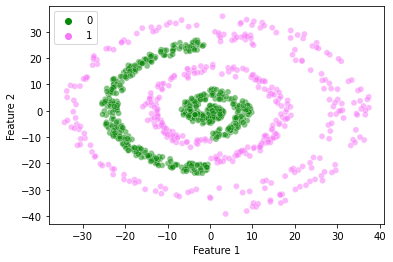

In [17]:
def plot_colors(student_id):
    color1 = "#"+student_id[1:]
    color2 = "#"+str(hex( int("FFFFFF" ,16) - int(student_id[1:],16)))[2:]
    return color1 , color2

psid = "2088807"
color1,color2 = plot_colors(psid)

sns.scatterplot(data=dataset4, 
                x='Feature 1', 
                y='Feature 2', 
                hue='Label',
                alpha=0.5,
                palette=plot_colors(psid))
plt.legend(loc='upper left')
plt.show()

The most significant feature here is the spriral shape of the scatter plot, indicating no relationship between Feature 1 and Feature 2. In the plot, all green dots (Class 0) and pink dots (Class 1) do not overlap yet respectively distribute to form a spiral. Hence, it is notably difficult to define a linear decision boundary to separate two classes in this case. Another noteworthy feature is that the closer the data points from the center of the spiral, the more overlapping appears and the denser the data points distribute. This applies for both pink and green data points.

**2.6. Visualization: Obtain four histograms, one for each selected feature in dataset4 and each class instances (first selected feature for class 0 instances, first selected feature for class 1 instances, second selected feature for class 0 instances and second selected feature for class 1 instances). Remember to use your personalized colors for two classes! Discuss the difficulty of separating two classes based on the selected features.**

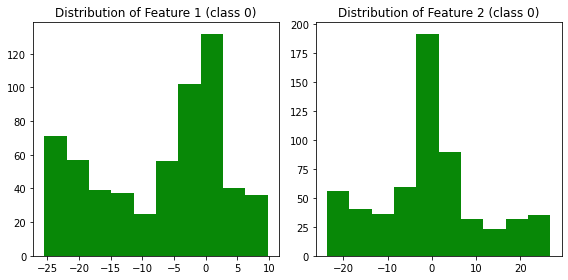

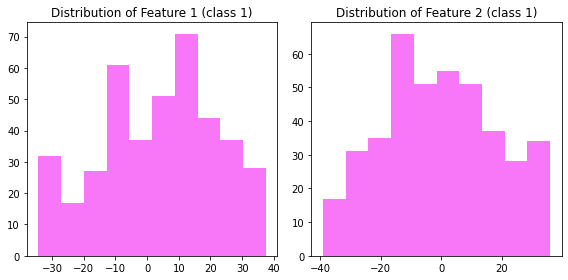

In [90]:
# Separate 2 classes in dataset4
dataset4_class_0 = dataset4[dataset4['Label']==0]
dataset4_class_1 = dataset4[dataset4['Label']==1]

plt.subplots(figsize=(8, 4))
# Feature 1 for class 0 instances
plt.subplot(1, 2, 1)
plt.hist(dataset4_class_0['Feature 1'], color=color1)
plt.title('Distribution of Feature 1 (class 0)')

# Feature 2 for class 0 instances
plt.subplot(1, 2, 2)
plt.hist(dataset4_class_0['Feature 2'], color=color1)
plt.title('Distribution of Feature 2 (class 0)')

plt.tight_layout()
plt.show()

plt.subplots(figsize=(8,4))
# Feature 1 for class 1 instances
plt.subplot(1, 2, 1)
plt.hist(dataset4_class_1['Feature 1'], color=color2)
plt.title('Distribution of Feature 1 (class 1)')

# Feature 2 for class 1 instances
plt.subplot(1, 2, 2)
plt.hist(dataset4_class_1['Feature 2'], color=color2)
plt.title('Distribution of Feature 2 (class 1)')

plt.tight_layout()
plt.show()

I think separating two classes based on the selected features does not have a high level of difficulty. However, it is sometimes confusing to create 4 histogram, one for each selected feature in dataset4 and each class instances, and colorcode them correctly.

**2.7. Splitting dataset: Use the function you wrote for subtask 2.3 and select 700 samples from dataset4. Call this new dataset training_set. Call remaining 300 samples as testing_set. Note you need to modify the function in task 2.3 as it needs to return the remained samples as another dataset!**

In [68]:
# Reuse function in 2.3 to split dataset4 into training and testing set
training_set = stratified_sampling(dataset4,700)
testing_set = dataset4.drop(training_set.index)

# Check the ratio in training and testing set
print(training_set[training_set['Label']==0].shape[0]/training_set[training_set['Label']==1].shape[0])
print(testing_set[testing_set['Label']==0].shape[0]/testing_set[testing_set['Label']==1].shape[0])

1.4647887323943662
1.4793388429752066


**2.8. Classification: Train a decision tree with depth=3 using your training_set. Report its classification accuracy using testing_set. Submit the decision tree.**

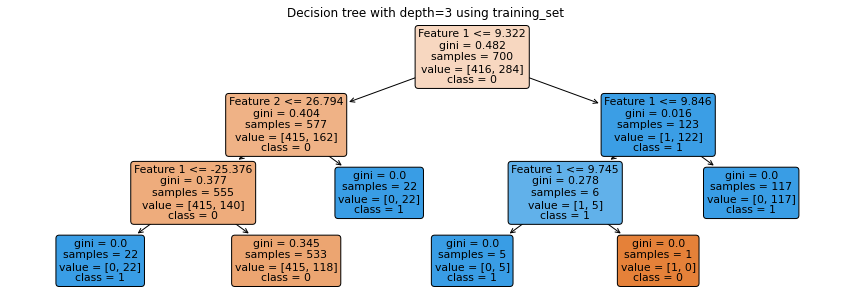

In [95]:
from sklearn.tree import DecisionTreeClassifier # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

X_train = training_set.drop('Label',axis=1)
Y_train = training_set.Label
X_test = testing_set.drop('Label',axis=1)
Y_test = testing_set.Label

# Build the decision tree
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, Y_train)

# Visualize tree model
feature_names = X_train.columns
class_names = {1: '1', 0: '0'}

plt.figure(figsize=(15,5))
plot_tree(model, 
          feature_names = feature_names, 
          class_names = class_names, 
          filled = True, 
          rounded = True)
plt.title('Decision tree with depth=3 using training_set')
plt.show()

In [109]:
# Accuracy
pred_model = model.predict(X_test)
accuracy = accuracy_score(Y_test, pred_model)*100
print('Classification accuracy = {:.2f}%'.format(accuracy))

Classification accuracy = 85.67%


**2.9. Feature creation: Write a function that accepts a dataset with two features $(f_1,f_2)$ as its input and builds a new dataset with a new feature computed as follows**
$$f_{new} = \sqrt{{f_1}^2+{f_2}^2}$$
**Create a new training_set and testing_set by passing training_set and testing_set through this function and call them c_training_set and c_testing_set.**

In [127]:
from math import sqrt

def create_feature(dataset,f1,f2):
    new = dataset.copy()
    new['New Feature'] = new.apply(lambda row: sqrt(row[f1]**2+row[f2]**2), axis = 1)
    return new.drop([f1,f2], axis = 1)


c_training_set = create_feature(training_set, 'Feature 1', 'Feature 2')
c_testing_set = create_feature(testing_set, 'Feature 1', 'Feature 2')
#c_training_set

**2.10. Visualization: Obtain two histograms for c_training_set for the new feature fnew, one for the instances of class 0 and one for instances of class 1.  Remember to use your personalized colors for two classes! Compare your obtained results with part 2.6 and explain the reasons.**

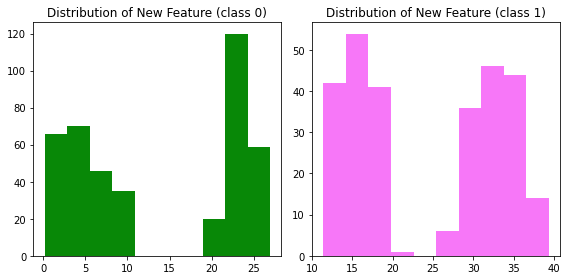

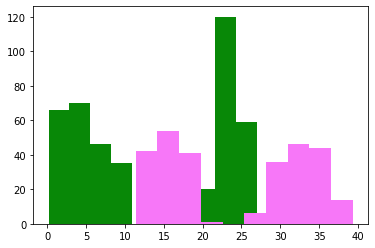

In [107]:
# Separate 2 classes in c_training_set
c_training_set_0 = c_training_set[c_training_set['Label']==0]
c_training_set_1 = c_training_set[c_training_set['Label']==1]

plt.subplots(figsize=(8, 4))
# New Feature for class 0 instances
plt.subplot(1, 2, 1)
plt.hist(c_training_set_0['New Feature'], color=color1)
plt.title('Distribution of New Feature (class 0)')

# New Feature for class 1 instances
plt.subplot(1, 2, 2)
plt.hist(c_training_set_1['New Feature'], color=color2)
plt.title('Distribution of New Feature (class 1)')

plt.tight_layout()
plt.show()

plt.hist(c_training_set_0['New Feature'], color=color1)
plt.hist(c_training_set_1['New Feature'], color=color2)
plt.show()

- Compare obtained histograms with histograms in 2.6: 
    - Regarding the green histograms (Class 0), the distribution of Feature 2 is obviously unimodel also quite symmetrical. The distribution of Feature 1 also looks unimodel despite a small sink in the middle. Both histograms have a continuous range. Finally, the distribution of New Feature is visibly bimodal. The histogram is divided to 2 separate blocks with a gap from 11-18.
    - Regarding the magenta histograms (Class 1), the distribution of Feature 1 appears to be multimodel while the distribution of Feature 2 is obviously unimodel. Both histograms have a continuous range. Meanwhile, the distribution of New Feature is bimodal with 2 separate blocks and a small gap from 22-25.
    - Finally, if we create a histogram of New Feature with both class instances, it can be seen that the two classes are well-separated, in which class 0 instances range from 0-11 and 20-27 while class 1 instances range from 12-20 and 25-39.
- By creating a new feature computed from feature 1 and 2 as $f_{new} = \sqrt{{f_1}^2+{f_2}^2}$, we basically rearrange all points in scatterplot in 2.5 onto a single line and obtain very well-separated values from 2 classes like in the histogram.

**2.11. Classification: Train a decision tree with depth=3 using your c_training_set. Report its classification accuracy using c_testing_set. Compare your result with subtask 2.8 and explain the reason.**

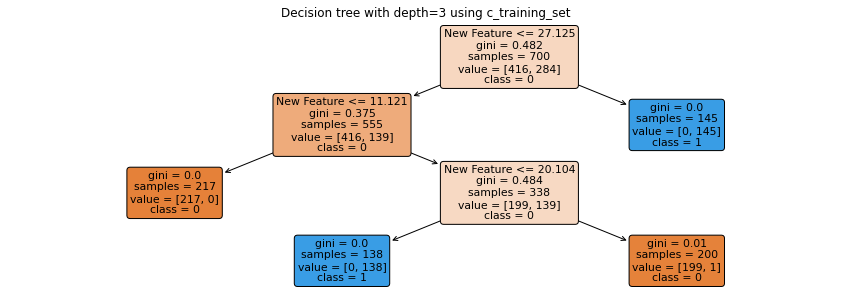

In [88]:
X_c_train = c_training_set.drop('Label',axis=1)
Y_c_train = c_training_set.Label
X_c_test = c_testing_set.drop('Label',axis=1)
Y_c_test = c_testing_set.Label

# Build the decision tree
model2 = DecisionTreeClassifier(max_depth = 3)
model2.fit(X_c_train, Y_c_train)

# Visualize tree model
feature_names_2 = X_c_train.columns

plt.figure(figsize=(15,5))
plot_tree(model2, 
          feature_names = feature_names_2, 
          class_names = {1: '1', 0: '0'}, 
          filled = True, 
          rounded = True)
plt.title('Decision tree with depth=3 using c_training_set')
plt.show()

In [108]:
# Accuracy
pred_model2 = model2.predict(X_c_test)
accuracy2 = accuracy_score(Y_c_test, pred_model2)*100
print('Classification accuracy = {:.2f}%'.format(accuracy2))

Classification accuracy = 99.33%


- In 2.8, we obtained a classifiation accuracy of 85.67%.  By fitting the new model with c_training_set, we got a much better rate, which is 99.33%. This means the `New Feature` attribute predicts `Label` very well, or almost accurately.
- By creating a new feature computed from feature 1 and 2 as $f_{new} = \sqrt{{f_1}^2+{f_2}^2}$, we basically rearrange all points in scatterplot in 2.5 onto a single line. From that, we obtain new values from 2 classes which are better-separated, allowing us to define more precise decision boudaries for the decision tree. This is reflected by a very high classifiation accuracy of the tree model.

**2.12. Building a pipeline: Write a function that accepts**
- A dataset 
- A variable specifying the sampling method (this variable can be set as “rgl” or “stf” by the user)
- A variable for number of samples in sampled dataset.
- A variable specifying the number of samples in training set

**as its input and outputs the classification accuracy. (Call the functions written in previous subtasks in this function. The output of one function must be fed the next one as its input.)
(Take the dataset and all required variables → Sampling based on the selected method → Feature selection → Feature creation → Splitting new dataset to train and test → Train a decision tree with depth=3 → classification accuracy)
Report the classification accuracy for following settings:**
1. Main dataset, “stf”, 500, 300
2. Main dataset, “rgl”, 100,70
3. Main dataset, “stf”, 1500,1000

Also, discuss the advantages of using a pipeline.

In [145]:
def pipeline(dataset, sampling_method, q, q_train):
    # Sampling based on the selected method 
    if sampling_method == "rgl":
        sample_dataset = sampling(dataset,q)
    if sampling_method == "stf":
        sample_dataset = stratified_sampling(dataset, q)
        
    # Feature selection
    f1,f2 = select_features(sample_dataset)
    
    # Create new dataset for training/testing
    sample_dataset_2 = sample_dataset[[f1,f2,'Label']]
    
    # Feature creation 
    final_dataset = create_feature(sample_dataset_2,f1,f2)
    
    # Splitting final dataset to train and test
    train = stratified_sampling(final_dataset,q_train)
    test = final_dataset.drop(train.index)
    
    # Find x_train, y_train, x_test, y_test
    x_train = train.drop('Label',axis=1)
    y_train = train.Label
    x_test = test.drop('Label',axis=1)
    y_test = test.Label
    
    # Train a decision tree with depth=3
    tree_model = DecisionTreeClassifier(max_depth = 3)
    tree_model.fit(x_train, y_train)
    
    # Classification accuracy
    y_pred = tree_model.predict(x_test)
    final_accuracy = accuracy_score(y_test, y_pred)*100
    
    return final_accuracy

print("Report")
print("-----------------------------------------------------------")
print("Case 1: Main dataset, 'stf', 500, 300 => Accuracy = {:.2f}%".format(pipeline(df, "stf", 500, 300)))
print("Case 2: Main dataset, 'rgl', 100, 70 => Accuracy = {:.2f}%".format(pipeline(df, "rgl", 100, 70)))
print("Case 3: Main dataset, 'stf', 1500, 1000 => Accuracy = {:.2f}%".format(pipeline(df, "stf", 1500, 1000)))


Report
-----------------------------------------------------------
Case 1: Main dataset, 'stf', 500, 300 => Accuracy = 99.50%
Case 2: Main dataset, 'rgl', 100, 70 => Accuracy = 100.00%
Case 3: Main dataset, 'stf', 1500, 1000 => Accuracy = 99.40%


Advantages of using a pipeline:
- Pipeline can be reused and repurposed for new input.
- Pipelines can be built incrementally by working on small manageable slices of the problem, so you are not overwhelmed by the actual problem.

**2.13. Write a conclusion about what you learned in this task and the problems you encountered during writing your code!**

After doing this task, I learnt to start off any problem by breaking it down into subproblems and proceed to tackle every subproblems first. In this case, to solve the subproblems, I need to write functions such as function for regular sampling, stratified sampling, feature selection, feature creation and so on. I would say writing functions is most trickiest part of this task. Even though it was hard, it all makes sense eventually when you get to build the pipeline. Now, I just need to combine all the functions I got from all the subtasks and then I was able to solve the main problem, which is the classification accuracy. With all the functions and the pipeline, the code for the whole problem turns out to be super clean and easy to interpret.